## Group No - 84

## Group Member Names:
1. C RAMAKRISHNA (2023ab05177)
2. POOJA PATILA (2023aa05194)
3. KASHYAP RAJPUROHIT (2023ab05027)
4. SAYANTA CHATTERJEE (2023aa05173)

## Journal used for the implemetation
Journal title: Classification and Segmentation of Brain Tumor MRI Images Using Convolutional Neural Networks

Authors: César Borja Ruiz

Journal Name: 2023 IEEE International Conference on Engineering Veracruz (ICEV)

Year: 2023

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, UpSampling2D, concatenate, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [2]:
##---------Type the code below this line------------------##
# URL - https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
# using image_dataset_from_directory to read the training images distributed in class label folder
# Since the training and testing sets are not balanced, it was combined into one set and then divide them in 80%-20% test-train split

path_to_data = './Brain-Tumor-Classification-DataSet/Training'
class_names = list(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [3]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##
#load the data into training and testing dataset
train_ds = image_dataset_from_directory(
    path_to_data,
    labels='inferred',
    label_mode='categorical',
    class_names= class_names,
    image_size=(128, 128),  # all images will be resized to 128x128
    batch_size=32,
    validation_split=0.2,
    seed = 42,
    subset='training')

test_ds = image_dataset_from_directory(
    path_to_data,
    labels='inferred',
    label_mode='categorical',
    class_names = class_names,
    image_size=(128, 128), # all images will be resized to 128x128
    batch_size=32,
    validation_split=0.2,
    seed=42,
    subset='validation')

normalize = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalize(x), y))
test_ds = test_ds.map(lambda x, y: (normalize(x), y))

## Identify the target variables.
##---------Type the code below this line------------------##

Found 3246 files belonging to 4 classes.
Using 2597 files for training.
Found 3246 files belonging to 4 classes.
Using 649 files for validation.


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [4]:
##---------Type the code below this line------------------##
# Define the CNN model
def create_classification_model(input_shape):
    model = Sequential([
        Input(input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.20),

        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')  # Assuming 4 classes
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the U-Net model
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Bottleneck
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv3)
    up1 = concatenate([up1, conv2], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
    up2 = UpSampling2D(size=(2, 2))(conv4)
    up2 = concatenate([up2, conv1], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up2)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [5]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##

# Train Classifier using Adam optimzer and Categorical Cross Entropy loss function for 50 epoch 
# Could not test Unet for segmatation as image mask data not available

input_shape = (128, 128, 3)
model = create_classification_model(input_shape)
h_train = model.fit(train_ds, epochs=50, validation_data=test_ds) # train the model

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.3563 - loss: 1.4294 - val_accuracy: 0.5239 - val_loss: 1.1060
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.5018 - loss: 1.1003 - val_accuracy: 0.5871 - val_loss: 0.8574
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.6445 - loss: 0.8231 - val_accuracy: 0.7196 - val_loss: 0.7316
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.7127 - loss: 0.7012 - val_accuracy: 0.7381 - val_loss: 0.6155
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.7586 - loss: 0.6037 - val_accuracy: 0.7966 - val_loss: 0.5853
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7918 - loss: 0.5447 - val_accuracy: 0.8120 - val_loss: 0.5140
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.8098 - loss: 0.4908 - val_accuracy: 0.8428 - val_loss: 0.4925
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8490 - loss: 0.4020 - val_accuracy: 0.8074 - v

# 6. Test the model


In [6]:
##---------Type the code below this line------------------##
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
  predictions = np.concatenate([predictions,np. argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
loss, acc = model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 997ms/step - accuracy: 0.9053 - loss: 0.6034


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


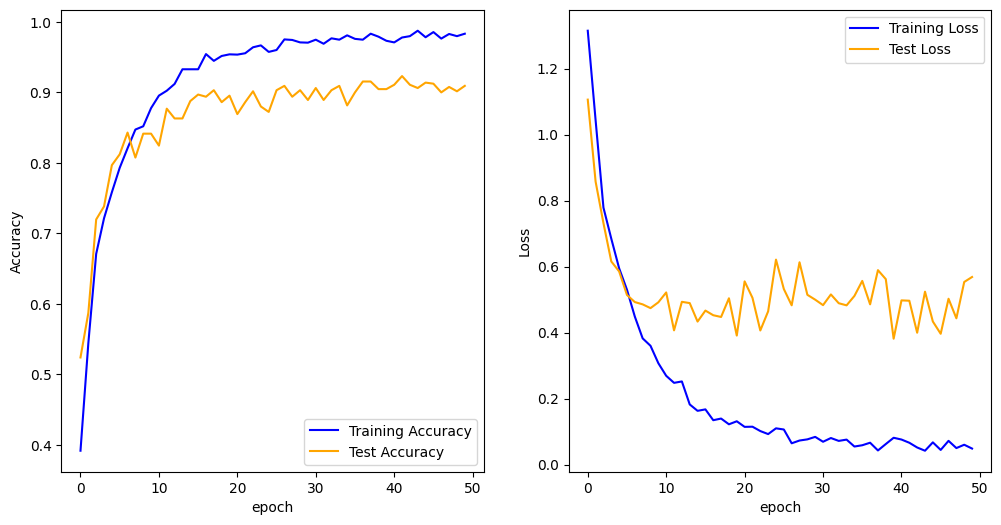

In [7]:
##---------Type the code below this line------------------##
# Create a figure with 2 subplots (one for acuracy history, one for Loss history)
plt.figure(figsize=(12, 6)) 
# First subplot for training and validation Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(h_train.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(h_train.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

# Second subplot for training and validation Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(h_train.history['loss'], label='Training Loss', color='blue')
plt.plot(h_train.history['val_loss'], label='Test Loss', color='orange')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Accuracy= 90.909
Model Loss 0.568
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       173
         1.0       0.93      0.84      0.88       202
         2.0       0.87      0.89      0.88        85
         3.0       0.93      0.99      0.96       189

    accuracy                           0.91       649
   macro avg       0.90      0.91      0.91       649
weighted avg       0.91      0.91      0.91       649



Text(0.5, 36.58159722222221, 'Predicted label')

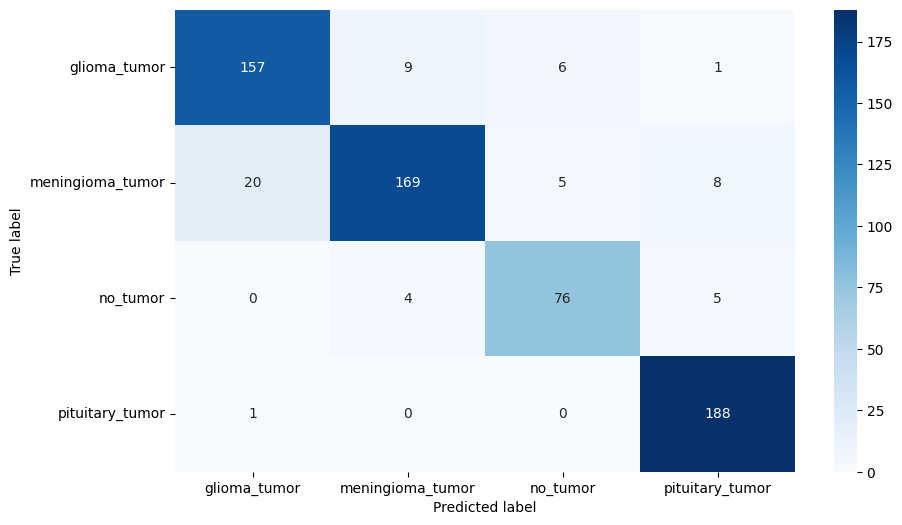

In [9]:
# model testing accuracy
print('Model Accuracy= %.3f' % (acc * 100.0)) 

# model testing loss
print('Model Loss %.3f' % loss) # print

# testing accuracy, precision, recall, f1-score
print(classification_report(labels, predictions))

# confustion matrix
cf = confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cf,cmap='Blues',annot=True, xticklabels=class_names,yticklabels=class_names, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck